In [71]:
import optuna
import optuna.visualization as vis
import pandas as pd
import pickle   
import matplotlib.pyplot as plt

In [72]:
results_classic = pd.read_csv('results/results_classical.csv')
results_xgboost = pd.read_csv('results/results_xgboost.csv')
results_mlp = pd.read_csv('results/results_MLP.csv')

In [73]:
# concat results 
results = pd.concat([results_classic, results_xgboost, results_mlp], ignore_index=True)

In [78]:
results.sort_values('r2', ascending=False, inplace=True)

In [79]:
results

version         model        r2           mse  \
59   stations_weights_inverse  XGBRegressor  0.790968  30140.569840   
60  stations_weights_gaussian  XGBRegressor  0.789009  30423.042082   
62    stations_weights_linear  XGBRegressor  0.788898  30439.061746   
58      stations_weighted_all  XGBRegressor  0.788506  30495.553464   
56                    classic  XGBRegressor  0.783911  31158.080454   
..                        ...           ...       ...           ...   
37  stations_weights_gaussian    ElasticNet  0.448668  79497.306395   
25   stations_weights_inverse           SVR  0.413345  84590.545032   
1                     classic           SVR  0.410023  85069.495581   
29   stations_weights_inverse    ElasticNet  0.395338  87186.970696   
5                     classic    ElasticNet  0.393349  87473.846353   

           mae                                        best_params  \
59  101.480831  {'n_estimators': 700, 'learning_rate': 0.06032...   
60  101.933963  {'n_estimators': 900, 'learning_rate': 0.06229...   
62  101.321920  {'n_estimators': 1100, 'learning_rate': 0.0157...   
58  102.600230  {'n_estimators': 1200, 'learning_rate': 0.0144...   
56  102.291392  {'n_estimators': 800, 'learning_rate': 0.01513...   
..         ...                                                ...   
37  199.709734  {'alpha': 0.10520458340764034, 'l1_ratio': 0.6...   
25  190.892765       {'C': 9.995516132209428, 'kernel': 'linear'}   
1   191.278674       {'C': 9.990075896272007, 'kernel': 'linear'}   
29  210.639075  {'alpha': 0.11320796430133717, 'l1_ratio': 0.2...   
5   211.049331  {'alpha': 0.12551398999907432, 'l1_ratio': 0.3...   

    validation_mae  
59      114.650424  
60      114.377542  
62      113.840505  
58      114.929505  
56      115.305035  
..             ...  
37      216.876220  
25      206.593766  
1       207.463478  
29      227.140987  
5       227.643877  

[70 rows x 7 columns]

In [37]:
results.to_csv('results/results.csv', index=False)

## Xgboost hyperparamaters

In [29]:
studies_xgboost = pickle.load(open('studies/studies_xgboost.pkl', 'rb'))
best_study_xgboost = studies_xgboost['stations_weights_linear_XGBRegressor']
best_study_xgboost.best_params

{'n_estimators': 1100,
 'learning_rate': 0.01576253164684871,
 'max_depth': 22,
 'min_child_weight': 4,
 'subsample': 0.5051200702138716,
 'colsample_bytree': 0.6569239664184245,
 'reg_alpha': 0.12392462946123958,
 'reg_lambda': 7.481477787444512}

/tmp/ipykernel_283274/2944987438.py:1: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  vis.matplotlib.plot_optimization_history(best_study_xgboost)


TypeError: title() missing 1 required positional argument: 'label'

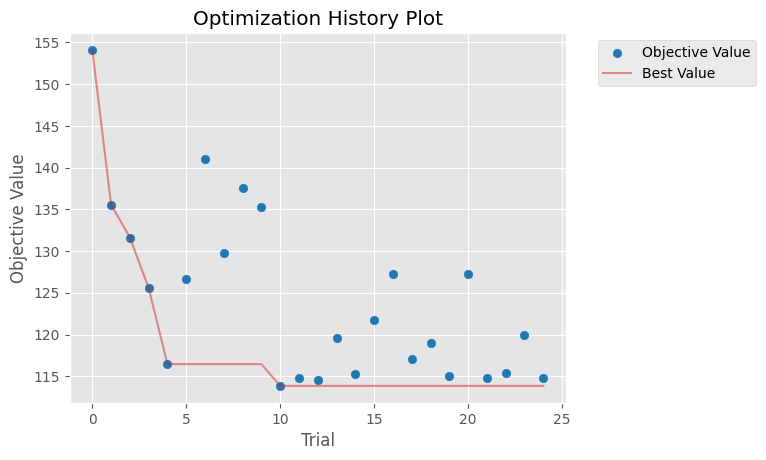

In [31]:


vis.matplotlib.plot_optimization_history(best_study_xgboost)
plt.title()
plt.show()

/tmp/ipykernel_283274/1305444920.py:1: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  vis.matplotlib.plot_param_importances(best_study_xgboost)


<Axes: title={'left': 'Hyperparameter Importances'}, xlabel='Hyperparameter Importance', ylabel='Hyperparameter'>

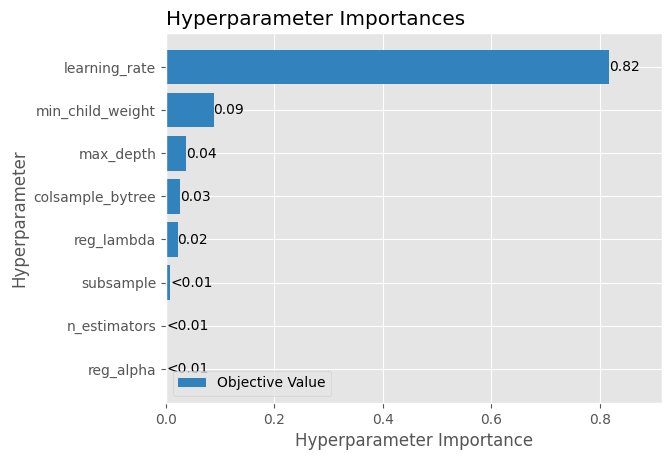

In [27]:
vis.matplotlib.plot_param_importances(best_study_xgboost)


/tmp/ipykernel_283274/1341360852.py:1: ExperimentalWarning: plot_contour is experimental (supported from v2.2.0). The interface can change in the future.
  vis.matplotlib.plot_contour(best_study_xgboost, params=["learning_rate", "min_child_weight"])
[W 2024-04-25 19:54:05,397] Output figures of this Matplotlib-based `plot_contour` function would be different from those of the Plotly-based `plot_contour`.


<Axes: title={'center': 'Contour Plot'}, xlabel='learning_rate', ylabel='min_child_weight'>

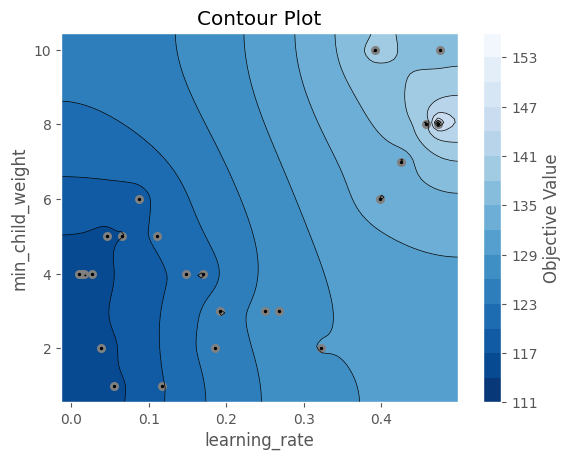

In [28]:
vis.matplotlib.plot_contour(best_study_xgboost, params=["learning_rate", "min_child_weight"])

In [ ]:
# Xgbooost feature importance